In [2]:
import pandas as pd
import numpy as np

import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  io import StringIO
from sklearn import tree

from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


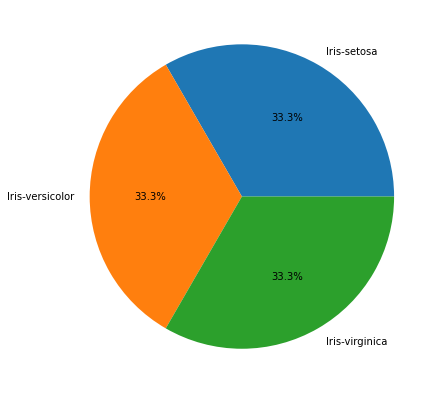

In [4]:
labels =pd.unique(df.species)
size=df.species.value_counts()

fig = plt.figure(figsize =(10, 7))
plt.pie(size, labels = labels , autopct='%1.1f%%')

plt.show()

In [5]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = np.array(df[['species']]).reshape(-1,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

In [7]:
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train,y_train)
predTree = irisTree.predict(X_test)
y_tree_test = pd.DataFrame({'predTree': predTree, 'y_test': y_test}, columns=['predTree','y_test'])
y_tree_test

,predTree,y_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [8]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9777777777777777


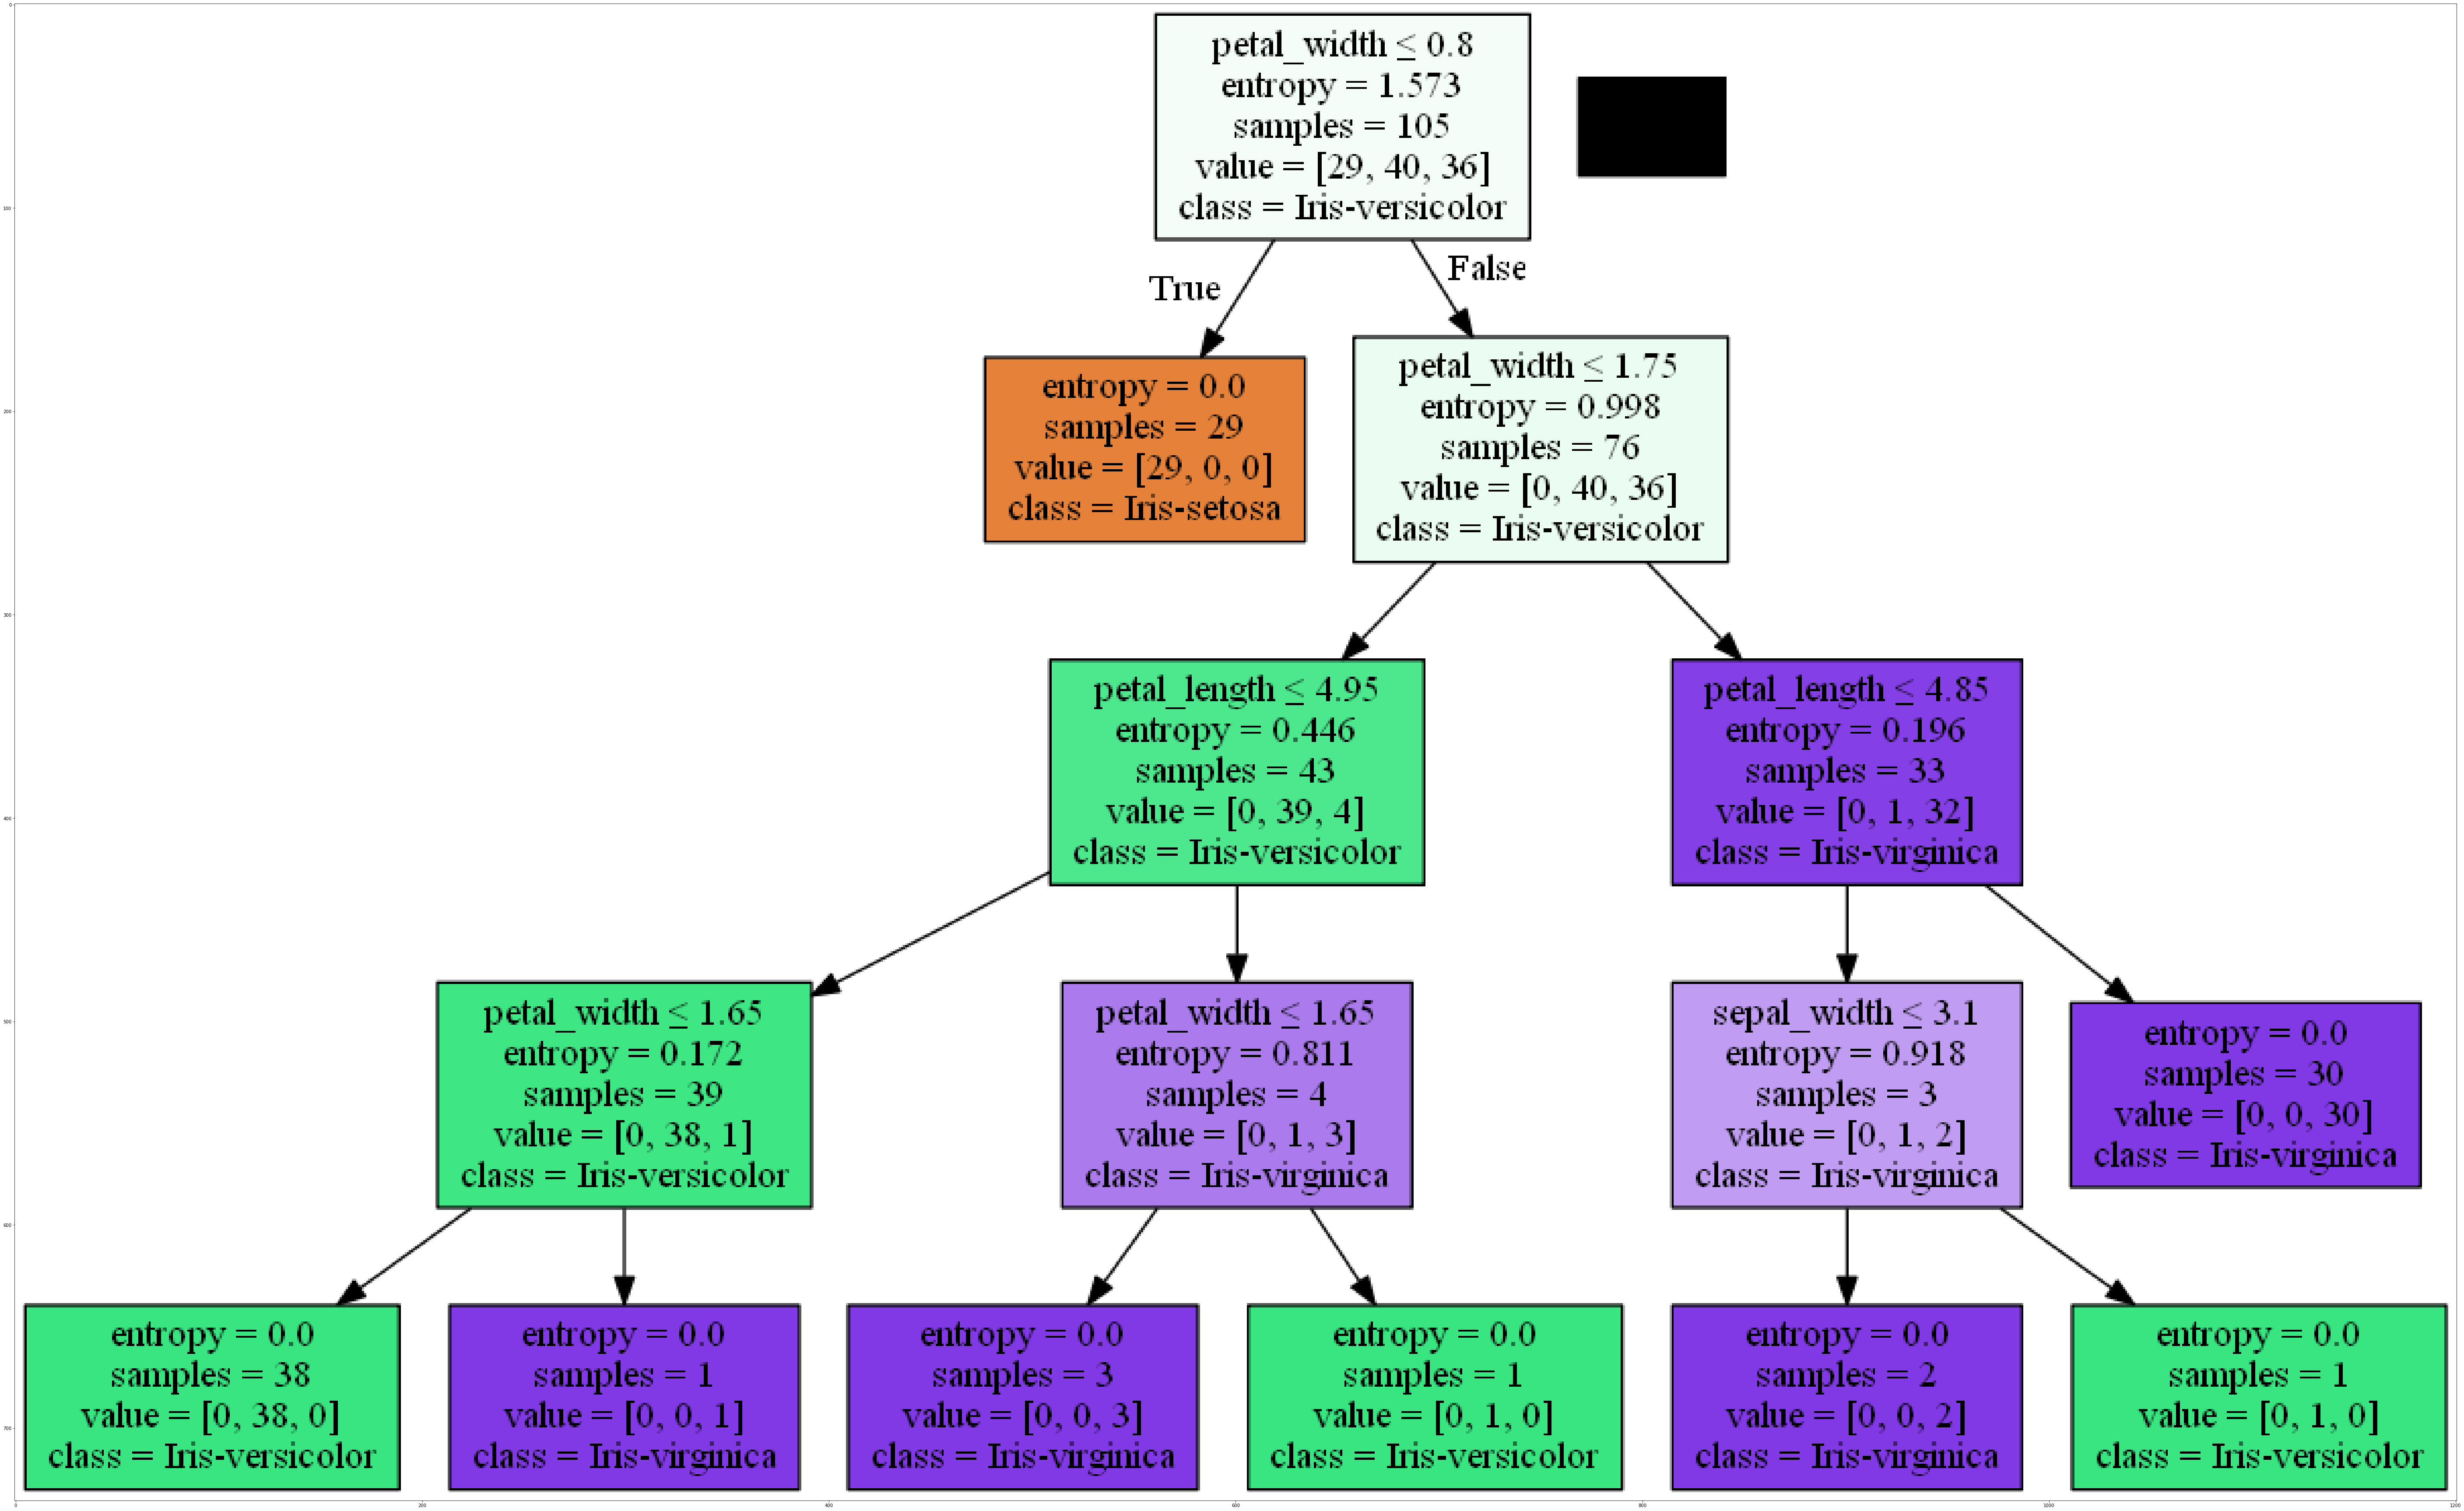

In [9]:
dot_data = StringIO()
filename = "iristree.png"
featureNames = df.columns[0:4]
out=tree.export_graphviz(irisTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')